In [59]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
import cv2

In [61]:

base_dir = os.getcwd()

# Go one level up and point to the images folder
input_dir = os.path.join(base_dir, '..', 'augmented_images2')
# input_dir = 'C:/Users/csman/Desktop/Desktop/7th sem/niqo/FONT_Recognition/augmented_images2/'
#test image
img = os.path.join(base_dir, '..', 'images','NotoSans-Regular','img4.jpg')
# img = cv2.imread('C:/Users/csman/Desktop/Desktop/7th sem/niqo/FONT_Recognition/images/NotoSans-Regular/img4.jpg')

In [62]:
def load_images_and_labels(input_dir):
    images = []
    labels = []
    font_types = sorted(os.listdir(input_dir))  # Assuming folders are named by font types
    
    for label, font in enumerate(font_types):
        font_dir = os.path.join(input_dir, font)
        
        for img_name in os.listdir(font_dir):
            img_path = os.path.join(font_dir, img_name)
            img = Image.open(img_path)
            img = img.convert('L')  # Optional: Convert to grayscale
            img_array = np.array(img) / 255.0  # Normalize pixel values (0 to 1)
            images.append(img_array)
            labels.append(label)  # Assign label based on the folder
            
    return np.array(images), np.array(labels), font_types

In [63]:
# Load images and labels
images, labels, font_types = load_images_and_labels(input_dir)

# Add a channel dimension for grayscale images (needed for CNN)
images = np.expand_dims(images, axis=-1)

# Split dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42, stratify=labels)

# Create TensorFlow datasets
BATCH_SIZE = 32
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))

# Shuffle and batch the datasets
train_dataset = train_dataset.shuffle(buffer_size=1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# Print label mapping for reference
label_mapping = {i: font for i, font in enumerate(font_types)}
print("Label mapping:", label_mapping)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'c:\\Users\\csman\\Desktop\\Desktop\\7th sem\\niqo\\FONT_Recognition\\..\\augmented_images2'

In [54]:
# # CNN Model Architecture

# # Input shape based on 64x64 images with 1 channel (grayscale)
# input_shape = (64, 64, 1)

# # Build the model
# model = models.Sequential()

# # First CNN layer followed by MaxPooling
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
# model.add(layers.MaxPooling2D((2, 2)))

# # Second CNN layer followed by MaxPooling
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))

# # Flatten the output and add Dense layers
# model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu'))

# # Output layer with 10 units (for 10 font types), using softmax activation
# model.add(layers.Dense(10, activation='softmax'))

# # Compile the model
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# # Model Summary
# model.summary()

# # Train the model
# EPOCHS = 10  # You can adjust this based on performance
# history = model.fit(train_dataset, epochs=EPOCHS, validation_data=val_dataset)
model = models.Sequential()

# 1st Conv Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

# 2nd Conv Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

# 3rd Conv Layer
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.BatchNormalization())
# model.add(layers.MaxPooling2D((2, 2)))

# 4th Conv Layer (Added layer for more complexity)
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

# Flatten
model.add(layers.Flatten())

# Dense Layers with Dropout
model.add(layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(layers.Dropout(0.3))

# Output Layer with 10 classes (Font Types)
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Model summary
model.summary()

# Train the model
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(train_dataset, epochs=50, validation_data=val_dataset, callbacks=[early_stop])

c:\Users\csman\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_52 (Conv2D)              │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_52          │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_52 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_53          │ (None, 29, 29, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_53 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_54 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_54          │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_54 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 684,810 (2.61 MB)

 Trainable params: 684,362 (2.61 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 174ms/step - accuracy: 0.1271 - loss: 6.2321 - val_accuracy: 0.1061 - val_loss: 4.7774
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 153ms/step - accuracy: 0.2398 - loss: 4.6915 - val_accuracy: 0.1136 - val_loss: 4.7582
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 153ms/step - accuracy: 0.3081 - loss: 4.3538 - val_accuracy: 0.1061 - val_loss: 4.7379
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 153ms/step - accuracy: 0.4022 - loss: 4.1294 - val_accuracy: 0.1061 - val_loss: 4.7199
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 163ms/step - accuracy: 0.5497 - loss: 3.7985 - val_accuracy: 0.1061 - val_loss: 4.7062
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 157ms/step - accuracy: 0.6134 - loss: 3.6240 - val_accuracy: 0.1061 - val_loss: 4.7039
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 151ms/step - accuracy: 0.6442 - loss: 3.4722 - val_accuracy: 0.1061 - val_loss: 4.7061
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 153ms/step - accuracy: 0.7229 - loss: 3.3314 - val_accuracy: 0.

In [55]:
model.save('font3_2.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step
[{'bounding_box': (0, 23, 64, 12), 'font_type': 4, 'confidence': 0.18422742}]


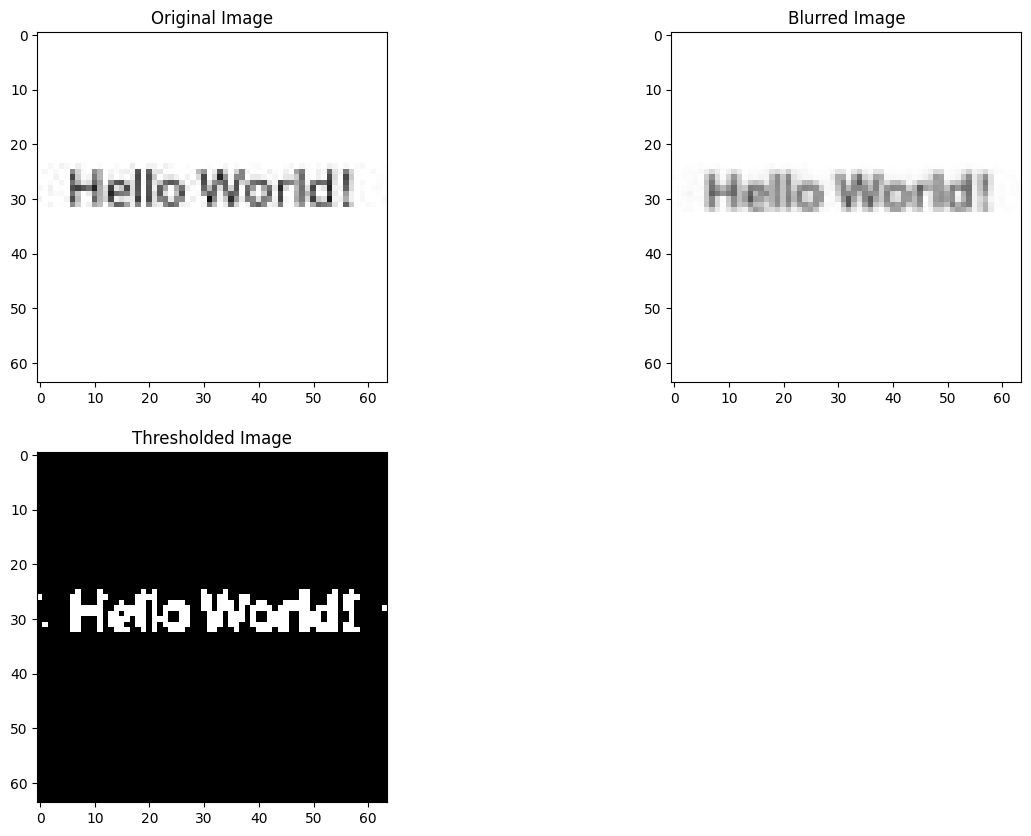

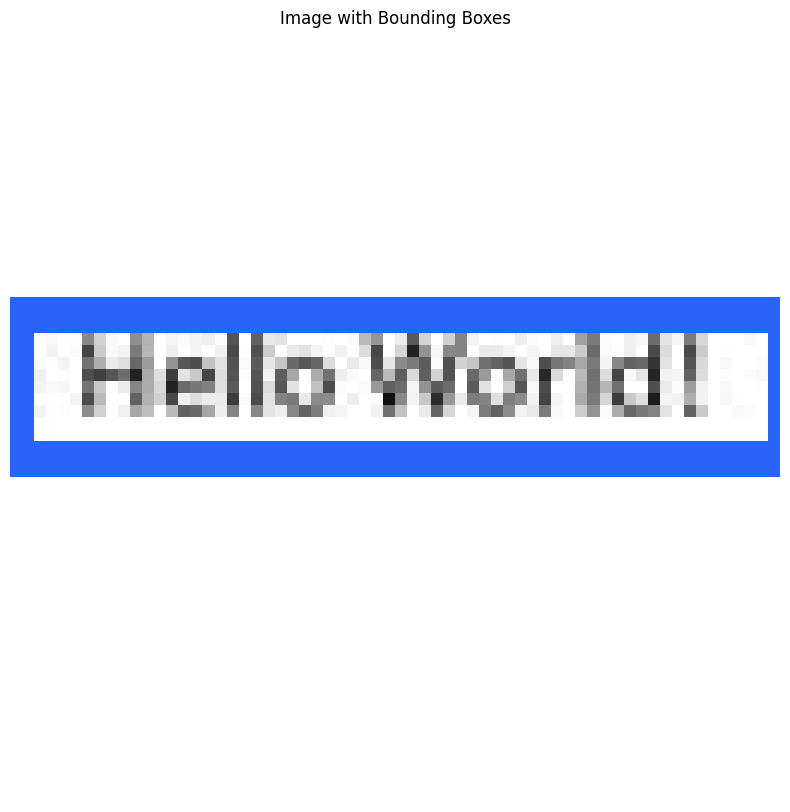

In [64]:

import cv2
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.image import pil_to_array

# Load the font classification model
model = tf.keras.models.load_model('font3.h5')

def gaussian_kernel(sigma, kernel_size=3):
    kernel = np.zeros((kernel_size, kernel_size))
    center = kernel_size // 2
    normalization_factor = 1 / (2 * np.pi * sigma**2)
    
    for i in range(kernel_size):
        for j in range(kernel_size):
            x = i - center
            y = j - center
            kernel[i, j] = normalization_factor * np.exp(-(x*2 + y*2) / (2 * sigma*2))
    
    kernel /= np.sum(kernel)
    return kernel

def apply_gaussian_blur(image, kernel_size=3, sigma=0.8):
    kernel = gaussian_kernel(sigma, kernel_size)
    return cv2.filter2D(image, -1, kernel)

def adaptive_thresholding(image):
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                   cv2.THRESH_BINARY_INV, 11, 2)
    return thresh

# Load and preprocess the image
img = cv2.imread('C:/Users/csman/Desktop/Desktop/7th sem/niqo/FONT_Recognition/images/NotoSans-Regular/img4.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Resize if necessary
h, w, c = img.shape
if w > 1000:
    new_w = 1000
    ar = w/h
    new_h = int(new_w/ar)
    img = cv2.resize(img, (new_w, new_h), interpolation=cv2.INTER_AREA)

# Apply Gaussian blur
blurred_img = apply_gaussian_blur(img, kernel_size=2, sigma=0.8)

# Apply adaptive thresholding
thresh_img = adaptive_thresholding(blurred_img)

# Dilate the thresholded image
dilated = cv2.dilate(thresh_img, None, iterations=2)

# Find contours
(contours, hierarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
sorted_contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[1])

# Initialize list to store output
output = []

# Loop over all detected contours to identify text and classify font
for contour in sorted_contours:
    x, y, w, h = cv2.boundingRect(contour)
    if cv2.contourArea(contour) > 100:  # Adjust based on smallest text size
        
        # Crop the image region
        cropped_image = img[y:y+h, x:x+w]
        
        # Resize and preprocess for font classification model
        cropped_image_pil = Image.fromarray(cropped_image)
        cropped_image_pil = cropped_image_pil.resize((64, 64))
        cropped_image_pil = cropped_image_pil.convert('L')  # Convert to grayscale if needed
        cropped_image_array = pil_to_array(cropped_image_pil) / 255.0  # Normalize
        cropped_image_array = cropped_image_array.reshape(1, 64, 64, 1)  # Reshape
        
        # Predict the font type
        predictions = model.predict(cropped_image_array)
        predicted_font = np.argmax(predictions[0])
        confidence_level = predictions[0][predicted_font]
        
        # Store the result
        result = {
            'bounding_box': (x, y, w, h),
            'font_type': predicted_font,
            'confidence': confidence_level
        }
        output.append(result)

# Output: List of bounding boxes with font types and confidence levels
print(output)

# Display results
plt.figure(figsize=(15, 10))
plt.subplot(221), plt.imshow(img), plt.title('Original Image')
plt.subplot(222), plt.imshow(blurred_img), plt.title('Blurred Image')
plt.subplot(223), plt.imshow(thresh_img, cmap='gray'), plt.title('Thresholded Image')

img_with_boxes = img.copy()
for box in output:
    box_coords = box['bounding_box']
    x, y, w, h = box_coords
    cv2.rectangle(img, (x, y), (x + w, y + h), (40, 100, 250), 2)  # Draw in blue with thickness 2

# Display the image with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.title('Image with Bounding Boxes')
plt.axis('off')  # Hide axes
plt.show()
